# **MODEL MEASUREMENT ANALYSIS**
# **Different metrics used to determine the performance of any classifier.** 
Using any dataset and any classifier do the following: 
*   Calculate TP, TN, FP and FN from sklearn 
*   Calculate different metrics (Accuracy, Precision, Recall(Sensitivity), F1-Score, MCC, Specificity, Negative Predictive Value) by defining our own functions
*   Get the sklearn metrics of these values 
*   Verify them by comparing with scikit-learn's library functions.
*   Get the result of Confusion Matrix from sklearn 
*   Plot the ROC Curve from sklearn of the probability values in our test data 
*   Calculate the AUC of our test data using sklearn
*   Interpret the results. Write the inference/analysis of each output. 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

np.random.seed(42)  # for reproducibility
sns.set(rc={"figure.figsize": (8, 8)})
sns.set_style("ticks")

# **Dataset**
Breast Cancer Dataset provided by sckit-learn in dataset module is used. 
*   Desscribe. this dataset
*   Analyze it



In [ ]:
data = load_breast_cancer()
print(data.DESCR[:760])  # print short description



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


# **Analysis of the Dataset**
*   There are 569 instances 
*   Each instance has 30 attributes 
*   Description - Specification, Name of each attribute is listed












In [ ]:
print(f"Types of cancer (targets) are {data.target_names}")

Types of cancer (targets) are ['malignant' 'benign']


# **Analysis of Output:**
# **What are the targets classes i.e. types of cancer.?**
Target Attribute Values are - **['malignant' 'benign']**

This dataset is used for binary classification between two types of cancer("Malignant" and "Benign").


In [ ]:
X = data.data  # features
y = data.target  # labels
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")
print("Targets are: ", y)


Shape of features is (569, 30), and shape of target is (569,)
Targets are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1

# **Analysis of Output**
We will consider benign as positive class, and malignant as negative class. Therefore, 
*   **0 for is_not_benign(malignant)**
*   **1 for is_benign**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42, stratify=y)
y_train[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

# **Split the data**
Since we shouldn't train and test our model with the same dataset, it is always a good idea to split the data in three parts - train data, test data, and validation data.

We won't require validation data here. 
We split the dataset into training and testing data
*   200 examples for testing. Code : test_size=200 
*   Rest, 369 examples for training




In [ ]:
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

# **Analysis of Code:**

**Classifier Used:** scikit's Support Vector Machines classifier for prediction. That is: sklearn.svm.



In [ ]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

# **Analysis of Code:**
*   fit/train the model on our training dataset.
*   It trains quite fast since we are working with relatively small dataset.

In [ ]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)
print("Prediction as class - malignanat or benign ", y_preds[:5])
print("Test Data are: ", y_test[:5])
print("Probability of malignant & probability of benign. ", y_proba[:5])


Prediction as class - malignanat or benign  [1 0 1 1 1]
Test Data are:  [1 0 1 1 1]
Probability of malignant & probability of benign.  [[3.02737643e-03 9.96972624e-01]
 [9.18633556e-01 8.13664441e-02]
 [8.32311692e-06 9.99991677e-01]
 [3.19060750e-02 9.68093925e-01]
 [9.28066587e-07 9.99999072e-01]]





# **Analysis of Code &. Output**
*   Save the prediction results both as ***probability*** and as ***classes***.
*   **y_preds** is a *1D vector* of one of {0, 1} values, denoting predictions as malignant and benign, respectively.
*   **y_test** is a 1D vector of one of (0,1) values of the 200 samples of test data 
*   **y_proba** is a *2D vector*, where for each example, it contains a vector of length 2,[prob. of malignant, prob. of benign]







In [ ]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))
print("2D to 1D reshaped Probability of benign. ", y_proba[:5])


2D to 1D reshaped Probability of benign.  [0.99697262 0.08136644 0.99999168 0.96809392 0.99999907]


# **Analysis of Code &. Output**
**y_proba** is reshaped into a 1D vector denoting the probability of having benign cancer.

In [ ]:
TN, FP, FP, TP = metrics.confusion_matrix(list(y_test), list(y_preds), labels=[0, 1]).ravel() #0,1 is default label of sklearn 
print("True Negatives", TN)
print("True Positives", TP)
print("False Positives", FP)
print("False Negatives", FP)

sklearnconf = metrics.confusion_matrix(y_test, y_preds)
print("\nsklearn Confusion Matrix is \n", sklearnconf)

conf=metrics.confusion_matrix(y_test, y_preds,labels=[1,0]) #Note to change the labels from the default 0,1 to 1,0
print("Confusion Matrix we want is: \n", conf)



True Negatives 68
True Positives 123
False Positives 2
False Negatives 2

sklearn Confusion Matrix is 
 [[ 68   7]
 [  2 123]]
Confusion Matrix we want is: 
 [[123   2]
 [  7  68]]


# **Analysis of code**
**Print the TP, TN, FP, FN** 
*   Use sklearn's function 
*   TN, FP, FP, TP = metrics.confusion_matrix(list(y_test), list(y_preds), labels=[0, 1]).ravel()
*   Note the default label is (0,1)

**Confusion Matrix**
*   Calculate confusion matrix of the predictions
*   Implemented in Scikit-learn's sklearn.metrics.confusion_matrix.

**Important Analysis: - Ulta Confusion Matrix**

In sklearn's code, they have considered **0** to be the *negative class* and **one** to be *positive class*. 

sklearn always considers the  
*   smaller number to be negative
*   large number to positive.

By number, I mean the class value (0 or 1). The order depends on our dataset and class.

Here we are looking at 

**0 for is_not_benign(malignant)**

**1 for is_benign**

# **To get the Confusion Matrix we want**

*   conf=metrics.confusion_matrix(y_test, y_preds,labels=[1,0]) 
*   Change the label to 1,0



Text(0.5, 303.58227272727277, 'Predicted label')

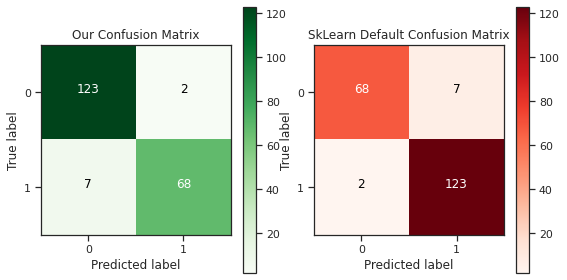

In [ ]:
classes = [0, 1]
# plot confusion matrix we want 
myplt=plt.figure(figsize=(8,8))
ax1 = myplt.add_subplot(2,2,1)
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Our Confusion Matrix")
ax1=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# plot confusion matrix given by sklearn

ax2 = myplt.add_subplot(2,2,2)
plt.imshow(sklearnconf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("SkLearn Default Confusion Matrix")
ax2=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = sklearnconf.max() / 2.
for i, j in itertools.product(range(sklearnconf.shape[0]), range(sklearnconf.shape[1])):
    plt.text(j, i, format(sklearnconf[i, j], fmt),
             horizontalalignment="center",
             color="white" if sklearnconf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# **Plotting the Confusion Matrix**

*   Confusion Matrix we want is Green Colour 
*   Sklearn Confusion Matrix is Red Colour 
*   Used Matplotlib sub-plot function to plot side-by-side in ax1 & ax2





**Below is. the code**

# **Analysis of Code below & above Output**
From the confusion matrix, we can see the number of examples predicted correct by our classifier, for both classes seperately.
*   Get the numbers of True Positives, True Negatives, False Positives, and False Negatives from this confusion matrix.
*   Store these terms in some variables
*   Calculate the Accuracy 



In [ ]:

results = {}


# **Calculate Accuracy**
number of examples correctly predicted / total number of examples

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [ ]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}") #Note the Formatting with f"{metric} and rounding to 3 decimal points with .3f

ACC is  0.979


# **Calculate Sensitivity or Recall or True Positive Rate(TPR)**
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  

  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)

In [ ]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.984


# **Calculate Specificity/True Negative Rate(TNR)**
number of samples actually and predicted as  `Negative` / total number of samples actually  `Negative`  
 
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)


In [ ]:
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.971


# **Calculate Precision/Positive Predictive Value(PPV)**
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

In [ ]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.984


# **Calculate Negative Predictive Value(NPV)**
number of samples actually and predicted as  `Negative` / total number of samples predicted as `Negative`    
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6da0f59faffbc1704974e97847ab4fa599f5521)


In [ ]:
metric = "NPV)"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV) is  0.971


# **Negative F1-Score**
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.984


# **Matthew's correlation coefficient(MCC)**
MCC = (TP*TN – FP*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN)

Matthew's coefficient range between `[-1, 1]`. `0` usually means totally random predictions. `1` means a perfect classifier, while a negative value (`[-1, 0)`) suggests a negative correlation between predictions and actual values.   
Here' the formual for MCC  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5caa90fc15105b74b59a30bbc9cc2e5bd43a13b7)

In [ ]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.955


In [ ]:
print(f"Calculated and scikit-learn Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Matthew's correlation coefficient: {results['MCC']: .3f}, {metrics.matthews_corrcoef(y_test, y_preds): .3f}")

Calculated and scikit-learn Accuracy:                           0.979,  0.955
Calculated and scikit-learn Precision score:                    0.984,  0.946
Calculated and scikit-learn Recall score:                       0.984,  0.984
Calculated and scikit-learn F1 score:                           0.984,  0.965
Calculated and scikit-learn Matthew's correlation coefficient:  0.955,  0.904


#**Comparing these calculated metrics with scikit-learn**

**Analysis**: These values match with the values calculated from `scikit-learn`'s functions.

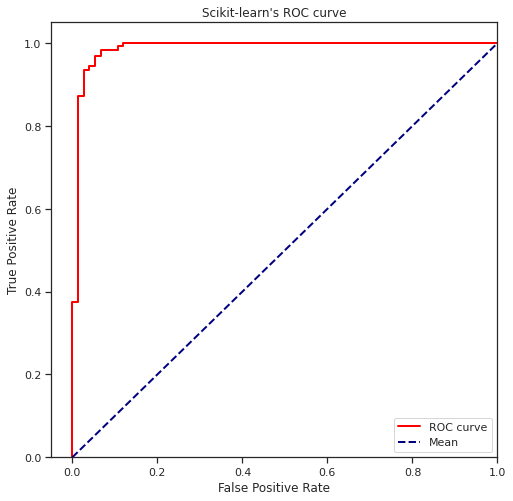

In [ ]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

# **ROC curve (Receiver Operating Characteristic curve)**
A receiver operating characteristic curve, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** *at various threshold settings. *

**Analysis:** The above is the ROC curve for the Breast Cancer Dataset.

**1.** The peak towards left-most corner means near perfect classifier

**2.** Random prediction will have the curve as the blue dotted straight line.

**3.** This ROC curve tells us that our model is nearly perfect classifier, with high accuracy!


In [ ]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9872


# **AUC: Area under the Curve**

It is the area under the ROC curve formed by the predictions.

A totally random prediction will have AUC score 0.5, while a perfect classifier will have AUC score of 1.

Our Result is 0.9872 which indicates a good classifier!

# **HAND CODED CONFUSION MATRIX, ROC, AUC**
**Expectation**: This output must match that of sklearn 

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
def get_roc_curve(y_test, y_proba, delta=0.1):
    """
    Return the True Positive Rates (TPRs), False Positive Rates (FPRs), 
    and the threshold values, seperated by delta.
    """
    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        # confusion matrix from the function we defined
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [ ]:





print(f"Calculated and scikit-learn Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Matthew's correlation coefficient: {results['MCC']: .3f}, {metrics.matthews_corrcoef(y_test, y_preds): .3f}")

Calculated and scikit-learn Accuracy:                           0.979,  0.955
Calculated and scikit-learn Precision score:                    0.984,  0.946
Calculated and scikit-learn Recall score:                       0.984,  0.984
Calculated and scikit-learn F1 score:                           0.984,  0.965
Calculated and scikit-learn Matthew's correlation coefficient:  0.955,  0.904


In [ ]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(y_test, y_proba, delta)

True Negatives 0
True Positives 125
False Positives 75
False Negatives 75
True Negatives 29
True Positives 125
False Positives 46
False Negatives 46
True Negatives 33
True Positives 125
False Positives 42
False Negatives 42
True Negatives 36
True Positives 125
False Positives 39
False Negatives 39
True Negatives 36
True Positives 125
False Positives 39
False Negatives 39
True Negatives 38
True Positives 125
False Positives 37
False Negatives 37
True Negatives 38
True Positives 125
False Positives 37
False Negatives 37
True Negatives 39
True Positives 125
False Positives 36
False Negatives 36
True Negatives 39
True Positives 125
False Positives 36
False Negatives 36
True Negatives 39
True Positives 125
False Positives 36
False Negatives 36
True Negatives 39
True Positives 125
False Positives 36
False Negatives 36
True Negatives 40
True Positives 125
False Positives 35
False Negatives 35
True Negatives 40
True Positives 125
False Positives 35
False Negatives 35
True Negatives 43
True Pos

In [ ]:
def get_roc_auc_score(y_test, y_proba):
    
    # use the function get_roc_curve that we created.
    FPRs, TPRs, _ = get_roc_curve(y_test, y_proba)
    FPRs.reverse()
    TPRs.reverse()
    x1, y1 = FPRs[0], TPRs[0]
    auc = 0.0
    prev = 0.0
    # cumulative differences in x-axis
    diffs = [FPRs[i] - FPRs[i-1] for i in range(1, len(FPRs))]
    for x, y in zip(diffs, TPRs[1:]):
        auc += (x * y1)  # area of rectangle
        auc += (x * (y - y1)/2)  # area of triangle formed (if any)
        y1 = y
    return auc

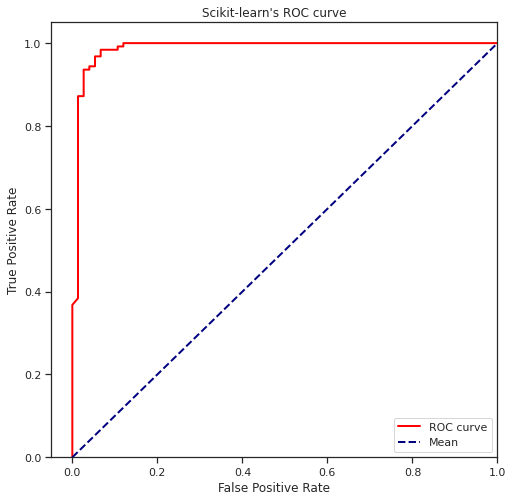

In [ ]:

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = get_roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

True Negatives 0
True Positives 125
False Positives 75
False Negatives 75
True Negatives 57
True Positives 125
False Positives 18
False Negatives 18
True Negatives 63
True Positives 125
False Positives 12
False Negatives 12
True Negatives 66
True Positives 125
False Positives 9
False Negatives 9
True Negatives 66
True Positives 125
False Positives 9
False Negatives 9
True Negatives 67
True Positives 124
False Positives 8
False Negatives 8
True Negatives 68
True Positives 123
False Positives 7
False Negatives 7
True Negatives 71
True Positives 121
False Positives 4
False Negatives 4
True Negatives 73
True Positives 112
False Positives 2
False Negatives 2
True Negatives 74
True Positives 104
False Positives 1
False Negatives 1
True Negatives 75
True Positives 0
False Positives 0
False Negatives 0
Scikit's ROC-AUC score of SVC model is  0.9874
